# Predicting Housing Prices

I will be using the open dataset called [Housing Values in Suburbs of Boston](https://www.kaggle.com/c/boston-housing#description) from the popular site [Kaggle](www.kaggle.com).

This dataset includes 14 explanatory variables describing aspects of residential homes in the Boston surburbs. The goal is to predict the value of each home.

In [3]:
import sqlite3
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
df = pd.read_csv('/Users/bwalsh/Desktop/Education/Python for Data Science/Final Project/train.csv')
df.shape

(333, 15)

In [5]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [6]:
df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

## Delcare the Columns You Want to Use as Features

In [7]:
features = [
    'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat'
]

## Specify the Prediction Target

In [8]:
target = ['medv']

## Clean the Data

In [9]:
# checking to see if any of the row values are null
df.isnull().any()

ID         False
crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
black      False
lstat      False
medv       False
dtype: bool

## Extract Features and Target ('medv') Values into Seperate DataFrames

In [10]:
X = df[features]
print(X)

         crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
0     0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
3     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
4     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
5     0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
6     0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
7     0.09378  12.5   7.87     0  0.524  5.889   39.0  5.4509    5  311   
8     0.62976   0.0   8.14     0  0.538  5.949   61.8  4.7075    4  307   
9     0.63796   0.0   8.14     0  0.538  6.096   84.5  4.4619    4  307   
10    0.62739   0.0   8.14     0  0.538  5.834   56.5  4.4986    4  307   
11    1.05393   0.0   8.14     0  0.538  5.935   29.3  4.4986    4  307   
12    0.80271   0.0   8.1

In [11]:
y = df[target]
print(y)

     medv
0    24.0
1    21.6
2    33.4
3    36.2
4    22.9
5    15.0
6    18.9
7    21.7
8    20.4
9    18.2
10   19.9
11   23.1
12   20.2
13   13.6
14   19.6
15   15.2
16   14.5
17   14.8
18   12.7
19   14.5
20   13.5
21   24.7
22   30.8
23   34.9
24   25.3
25   24.7
26   21.2
27   19.3
28   20.0
29   16.6
..    ...
303  21.4
304  19.9
305  19.0
306  19.1
307  19.1
308  20.1
309  19.6
310  23.2
311  13.8
312  16.7
313  12.0
314  14.6
315  21.4
316  23.0
317  23.7
318  21.8
319  20.6
320  19.1
321  20.6
322  15.2
323   8.1
324  13.6
325  20.1
326  21.8
327  18.3
328  17.5
329  22.4
330  20.6
331  23.9
332  11.9

[333 rows x 1 columns]


In [12]:
# Let's print the second row for X
X.iloc[2]

crim         0.03237
zn           0.00000
indus        2.18000
chas         0.00000
nox          0.45800
rm           6.99800
age         45.80000
dis          6.06220
rad          3.00000
tax        222.00000
ptratio     18.70000
black      394.63000
lstat        2.94000
Name: 2, dtype: float64

In [13]:
# dipslaying target values
y

,medv
0,24.0
1,21.6
2,33.4
3,36.2
4,22.9
5,15.0
6,18.9
7,21.7
8,20.4
9,18.2


## Explore the data

In [14]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


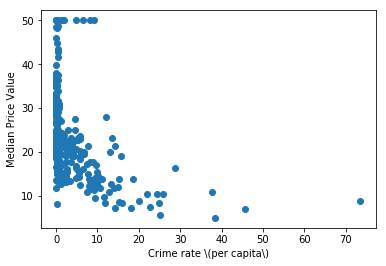

In [15]:
%matplotlib inline

fig, axis = plt.subplots()
# Grid lines, Xtricks, Xlabel, Ylabel

axis.set_xlabel('Crime rate \(per capita\)',fontsize=10)
axis.set_ylabel('Median Price Value',fontsize=10)

X = df['crim']
Y = df['medv']

axis.scatter(X, Y)
plt.show()

In [16]:
np.corrcoef(df['crim'],df['medv'])

array([[ 1.        , -0.40745432],
       [-0.40745432,  1.        ]])

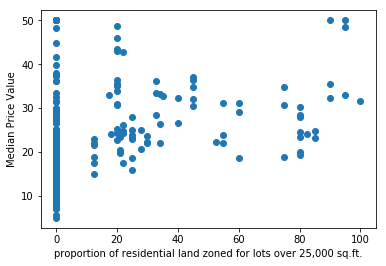

In [17]:
%matplotlib inline

fig, axis = plt.subplots()
# Grid lines, Xtricks, Xlabel, Ylabel

axis.set_xlabel('proportion of residential land zoned for lots over 25,000 sq.ft.',fontsize=10)
axis.set_ylabel('Median Price Value',fontsize=10)

X = df['zn']
Y = df['medv']

axis.scatter(X, Y)
plt.show()

In [18]:
np.corrcoef(df['zn'],df['medv'])

array([[ 1.        ,  0.34484198],
       [ 0.34484198,  1.        ]])

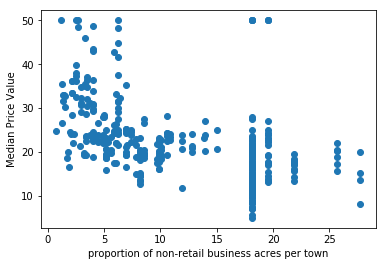

In [19]:
%matplotlib inline

fig, axis = plt.subplots()
# Grid lines, Xtricks, Xlabel, Ylabel

axis.set_xlabel('proportion of non-retail business acres per town',fontsize=10)
axis.set_ylabel('Median Price Value',fontsize=10)

X = df['indus']
Y = df['medv']

axis.scatter(X, Y)
plt.show()

In [20]:
np.corrcoef(df['indus'],df['medv'])

array([[ 1.        , -0.47393197],
       [-0.47393197,  1.        ]])

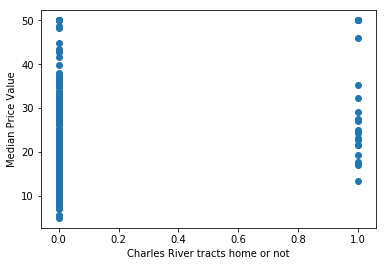

In [21]:
%matplotlib inline

fig, axis = plt.subplots()
# Grid lines, Xtricks, Xlabel, Ylabel

axis.set_xlabel('Charles River tracts home or not',fontsize=10)
axis.set_ylabel('Median Price Value',fontsize=10)

X = df['chas']
Y = df['medv']

axis.scatter(X, Y)
plt.show()

In [22]:
np.corrcoef(df['chas'],df['medv'])

array([[ 1.        ,  0.20438999],
       [ 0.20438999,  1.        ]])

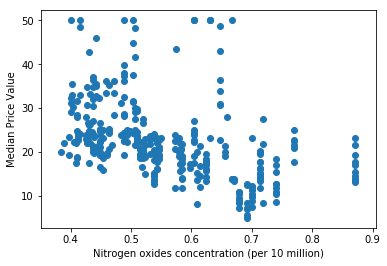

In [23]:
%matplotlib inline

fig, axis = plt.subplots()
# Grid lines, Xtricks, Xlabel, Ylabel

axis.set_xlabel('Nitrogen oxides concentration (per 10 million)',fontsize=10)
axis.set_ylabel('Median Price Value',fontsize=10)

X = df['nox']
Y = df['medv']

axis.scatter(X, Y)
plt.show()

In [24]:
np.corrcoef(df['nox'],df['medv'])

array([[ 1.        , -0.41305415],
       [-0.41305415,  1.        ]])

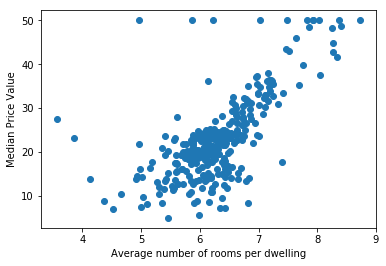

In [50]:
%matplotlib inline

fig, axis = plt.subplots()
# Grid lines, Xtricks, Xlabel, Ylabel

axis.set_xlabel('Average number of rooms per dwelling',fontsize=10)
axis.set_ylabel('Median Price Value',fontsize=10)

X = df['rm']
Y = df['medv']



axis.scatter(X, Y)
plt.show()

In [26]:
np.corrcoef(df['rm'],df['medv'])

array([[ 1.        ,  0.68959809],
       [ 0.68959809,  1.        ]])

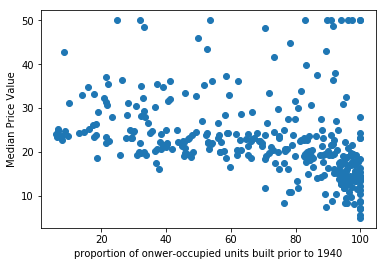

In [27]:
%matplotlib inline

fig, axis = plt.subplots()
# Grid lines, Xtricks, Xlabel, Ylabel

axis.set_xlabel('proportion of onwer-occupied units built prior to 1940',fontsize=10)
axis.set_ylabel('Median Price Value',fontsize=10)

X = df['age']
Y = df['medv']

axis.scatter(X, Y)
plt.show()

In [28]:
np.corrcoef(df['age'],df['medv'])

array([[ 1.        , -0.35888827],
       [-0.35888827,  1.        ]])

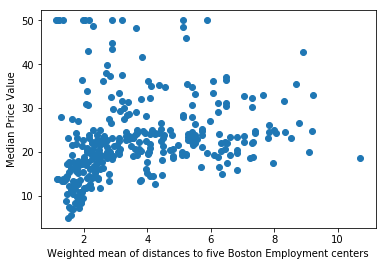

In [29]:
%matplotlib inline

fig, axis = plt.subplots()
# Grid lines, Xtricks, Xlabel, Ylabel

axis.set_xlabel('Weighted mean of distances to five Boston Employment centers',fontsize=10)
axis.set_ylabel('Median Price Value',fontsize=10)

X = df['dis']
Y = df['medv']

axis.scatter(X, Y)
plt.show()

In [30]:
np.corrcoef(df['dis'],df['medv'])

array([[ 1.        ,  0.24942227],
       [ 0.24942227,  1.        ]])

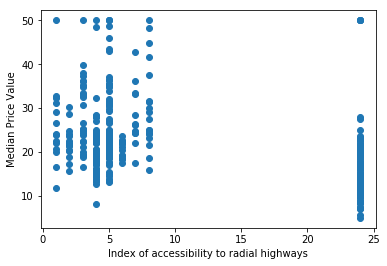

In [31]:
%matplotlib inline

fig, axis = plt.subplots()
# Grid lines, Xtricks, Xlabel, Ylabel

axis.set_xlabel('Index of accessibility to radial highways',fontsize=10)
axis.set_ylabel('Median Price Value',fontsize=10)

X = df['rad']
Y = df['medv']

axis.scatter(X, Y)
plt.show()

In [32]:
np.corrcoef(df['rad'],df['medv'])

array([[ 1.        , -0.35225082],
       [-0.35225082,  1.        ]])

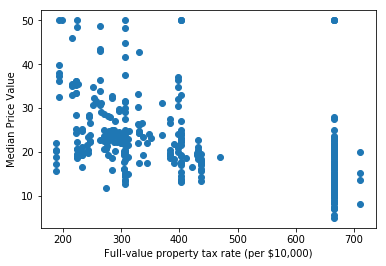

In [33]:
%matplotlib inline

fig, axis = plt.subplots()
# Grid lines, Xtricks, Xlabel, Ylabel

axis.set_xlabel('Full-value property tax rate (per $10,000)',fontsize=10)
axis.set_ylabel('Median Price Value',fontsize=10)

X = df['tax']
Y = df['medv']

axis.scatter(X, Y)
plt.show()

In [34]:
np.corrcoef(df['tax'],df['medv'])

array([[ 1.        , -0.44807769],
       [-0.44807769,  1.        ]])

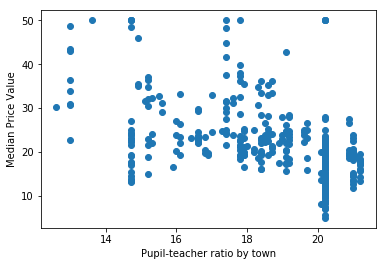

In [35]:
%matplotlib inline

fig, axis = plt.subplots()
# Grid lines, Xtricks, Xlabel, Ylabel

axis.set_xlabel('Pupil-teacher ratio by town',fontsize=10)
axis.set_ylabel('Median Price Value',fontsize=10)

X = df['ptratio']
Y = df['medv']

axis.scatter(X, Y)
plt.show()

In [36]:
np.corrcoef(df['ptratio'],df['medv'])

array([[ 1.        , -0.48137596],
       [-0.48137596,  1.        ]])

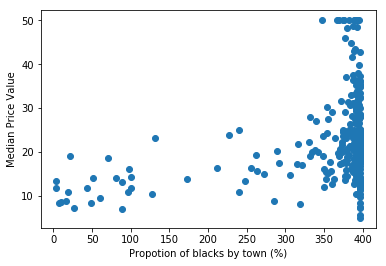

In [37]:
%matplotlib inline

fig, axis = plt.subplots()
# Grid lines, Xtricks, Xlabel, Ylabel

axis.set_xlabel('Propotion of blacks by town (%)',fontsize=10)
axis.set_ylabel('Median Price Value',fontsize=10)

X = df['black']
Y = df['medv']

axis.scatter(X, Y)
plt.show()

In [38]:
np.corrcoef(df['black'],df['medv'])

array([[ 1.        ,  0.33665956],
       [ 0.33665956,  1.        ]])

In [39]:
np.corrcoef(df['lstat'],df['medv'])

array([[ 1.        , -0.73860003],
       [-0.73860003,  1.        ]])

## Split the Dataset into Training and Test Datasets

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

## (1) Linear Regression: Fit a model to athe training set

In [365]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Perform Prediction using Linear Regression Model

In [366]:
y_prediction = regressor.predict(X_test)
y_prediction

array([[ 24.51289703],
       [ 31.73958938],
       [ 24.16079159],
       [ 20.17101962],
       [ 19.92546726],
       [ 17.09661694],
       [ 31.28138187],
       [ 19.41122231],
       [ 11.90960216],
       [ 37.91837578],
       [ 22.36855628],
       [ 20.47013531],
       [ 16.97998159],
       [ 22.40846053],
       [ 22.20474882],
       [ 22.97537319],
       [ 24.19824859],
       [ 12.01903279],
       [ 18.96063055],
       [ 21.58521279],
       [ 26.68205117],
       [ 27.47636576],
       [ 27.04970322],
       [ 21.85763436],
       [ 17.57938034],
       [ 20.9675915 ],
       [ 22.38825601],
       [  1.60596211],
       [ 23.91606604],
       [ 21.68954971],
       [ 18.53815072],
       [ 26.20696624],
       [ 22.56560315],
       [ 20.31037568],
       [ 15.22213208],
       [ 24.55684838],
       [ 27.15589569],
       [ 27.20956552],
       [ 24.80526392],
       [ 31.32409661],
       [ 26.15692686],
       [ 26.05224095],
       [ 33.63483611],
       [ 26

## What is the mean of the expected target value in test set?

In [367]:
y_test.describe()

,medv
count,110.000000
mean,22.150909
std,7.373804
min,7.400000
25%,17.800000
50%,21.800000
75%,24.375000
max,50.000000


## Evaluate Linear Regression Accuracy using Root Mean Square Error

RMSE captures the variation of the predicted value. An RMSE score of zero
means perfect prediction with no errors,
which is the ideal scenario, which almost never happens.
<br><br>
When comparing two regression models,
then the one with the smaller RMSE will be better
since its predictions will have smaller difference
from the observed values, or the measured values, before.

In [368]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [369]:
print(RSME)

4.881392766371708


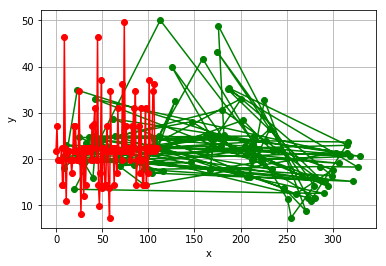

In [494]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.plot(y_test, color='green', marker = "o")
plt.plot(y_prediction, color='red', marker = "o")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()



# Create a scatter plot of Salary vs Grade
df.plot(kind='scatter', title='Grade vs Salary', x='Grade', y='Salary')

# Add a line of best fit
plt.plot(np.unique(df['Grade']), np.poly1d(np.polyfit(df['Grade'], df['Salary'], 1))(np.unique(df['Grade'])))

plt.show()

## (2) Decision Tree Regressor: Fit a new regression model to the training set

A decision tree regressor
builds a model in a top-down manner
by splitting data set on an attribute.
So the algorithm chooses the attribute
which gives maximum reduction in standard deviation.


In [370]:
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## Perform Prediction Using Decision Tree Regressor

In [371]:
y_prediction = regressor.predict(X_test)
y_prediction

array([ 21.78064516,  27.21333333,  19.78064516,  19.78064516,
        19.78064516,  19.78064516,  22.46875   ,  14.46428571,
        14.46428571,  46.275     ,  22.46875   ,  10.9       ,
        21.3       ,  21.78064516,  21.78064516,  19.78064516,
        19.78064516,  17.06666667,  19.78064516,  27.21333333,
        21.78064516,  27.21333333,  21.78064516,  19.78064516,
        19.78064516,  34.65      ,  19.78064516,   8.1       ,
        21.78064516,  22.46875   ,  12.        ,  22.46875   ,
        14.46428571,  21.78064516,  21.78064516,  22.46875   ,
        22.46875   ,  21.78064516,  19.78064516,  27.21333333,
        19.78064516,  27.5       ,  31.15714286,  22.46875   ,
        19.78064516,  46.275     ,  14.46428571,   9.97      ,
        17.06666667,  37.2       ,  13.85      ,  22.46875   ,
        21.78064516,  14.46428571,  14.46428571,  27.21333333,
        21.78064516,  13.85      ,   7.31428571,  34.65      ,
        21.78064516,  22.46875   ,  22.46875   ,  14.46

## For comparison: What is the mean of the expected target value in test set ?

In [372]:
y_test.describe()

,medv
count,110.000000
mean,22.150909
std,7.373804
min,7.400000
25%,17.800000
50%,21.800000
75%,24.375000
max,50.000000


## Evaluate Decision Tree Regression Accuracy using Root Mean Square Error

In [373]:
RSME = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [374]:
print(RSME)

4.146173480633105
